In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets, preprocessing, metrics
import sklearn as sk
import math 
import pprint
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score, mean_squared_error
import pickle

In [36]:
df = pd.read_csv('proffData.csv')
df.head(20)

,amountemployes,beforetaxes
0,1855,65285
1,1464,-146000
2,36,4333
3,1386,1906692
4,2317,2691000
5,20,11
6,2340,754384
7,22150,56771000
8,87,46810
9,59,4469


In [37]:
df1 = pd.read_csv('task2.2.csv')
del df1[df1.columns[0]]
df1.head(1)

,vat,name,address,zipcode,city,protected,phone,email,fax,startdate,employees,industrycode,industrydesc,companycode,companydesc,productionunits,t,version
0,26911745,KMD A/S,Lautrupparken 40,2750,Ballerup,False,44601000.0,info@kmd.dk,44604106.0,03/12 - 2002,1886,620200,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,"[{'pno': 1017630322, 'main': False, 'name': 'K...",100,6
1,13594376,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",Sundkrogsgade 4,2100,København Ø,False,39175000.0,NaN,NaN,16/10 - 1999,1464,651100,Livsforsikring,60,Aktieselskab,"[{'pno': 1000591581, 'main': False, 'name': 'P...",100,6
2,40916458,Dynatest A/S,Tempovej 27,2750,Ballerup,False,70253355.0,NaN,NaN,07/11 - 2019,34,265100,"Fremstilling af udstyr til måling, afprøvning,...",60,Aktieselskab,"[{'pno': 1025210030, 'main': True, 'name': 'Dy...",100,6
3,42334219,OTICON A/S,Kongebakken 9,2765,Smørum,False,39177100.0,NaN,39277900.0,30/12 - 1957,1596,266010,Fremstilling af høreapparater og dele hertil,60,Aktieselskab,"[{'pno': 1006552453, 'main': False, 'name': 'O...",100,6
4,78040017,TOPDANMARK A/S,Borupvang 4,2750,Ballerup,False,70158585.0,NaN,NaN,20/05 - 1985,8,642010,Finansielle holdingselskaber,60,Aktieselskab,"[{'pno': 1015253246, 'main': False, 'name': 'T...",100,6


In [38]:
final = pd.concat([df1, df], axis=1)

In [40]:
final.head(2)

,vat,name,address,zipcode,city,protected,phone,email,fax,startdate,employees,industrycode,industrydesc,companycode,companydesc,productionunits,t,version,amountemployes,beforetaxes
0,26911745,KMD A/S,Lautrupparken 40,2750,Ballerup,False,44601000.0,info@kmd.dk,44604106.0,03/12 - 2002,1886,620200,Konsulentbistand vedrørende informationsteknologi,60,Aktieselskab,"[{'pno': 1017630322, 'main': False, 'name': 'K...",100,6,1855,65285
1,13594376,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",Sundkrogsgade 4,2100,København Ø,False,39175000.0,NaN,NaN,16/10 - 1999,1464,651100,Livsforsikring,60,Aktieselskab,"[{'pno': 1000591581, 'main': False, 'name': 'P...",100,6,1464,-146000


In [41]:
new_df = final.loc[:, ['name','city', 'amountemployes','beforetaxes' ]]

In [42]:
new_df

,name,city,amountemployes,beforetaxes
0,KMD A/S,Ballerup,1855,65285
1,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",København Ø,1464,-146000
2,Dynatest A/S,Ballerup,36,4333
3,OTICON A/S,Smørum,1386,1906692
4,TOPDANMARK A/S,Ballerup,2317,2691000
5,NORTHTECH ApS,København K,20,11
6,Netcompany A/S,København K,2340,754384
7,NOVO NORDISK A/S,Bagsværd,22150,56771000
8,FORMPIPE SOFTWARE A/S,Ballerup,87,46810
9,ALPHA SOLUTIONS A/S,København K,59,4469


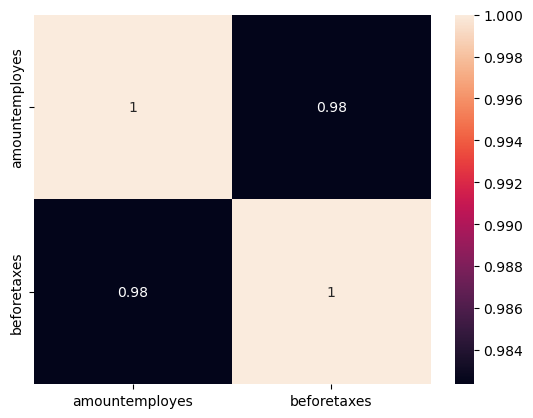

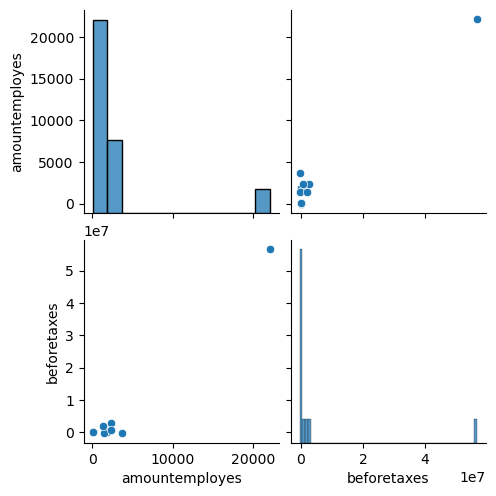

R-squared score: -493.0531352268803
Mean squared error: 74044130243771.98
Predicted revenue for next year: 8881625.536441227


In [9]:
X = df[['beforetaxes']]
y = df['beforetaxes'].shift(-1)
X = X[:-1]
y = y[:-1]
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix, annot=True)
sns.pairplot(new_df[['amountemployes', 'beforetaxes']])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-squared score:', r2)
print('Mean squared error:', mse)

X_new = np.array([[df['beforetaxes'].iloc[-1]]])
X_new = pd.DataFrame(X_new, columns=['beforetaxes'])
y_new = model.predict(X_new)
print('Predicted revenue for next year:', y_new[0])

In [10]:
X = df['amountemployes'].values.reshape(-1, 1)
y = df['beforetaxes'].values.reshape(-1, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10, 1)
(10, 1)
(2, 1)
(2, 1)


In [13]:
myreg = LinearRegression()

In [14]:
myreg.fit(X_train, y_train)

LinearRegression()

In [15]:
a = myreg.coef_
b = myreg.intercept_

In [16]:
y_predicted = myreg.predict(X_test)

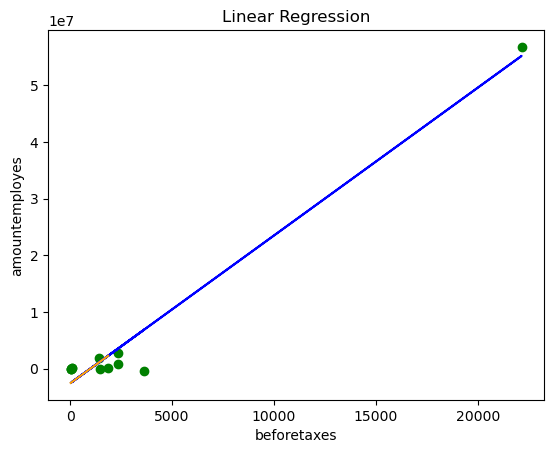

In [17]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('beforetaxes')
plt.ylabel('amountemployes')
plt.show()

In [18]:
R2 = myreg.score(X, y)
R2

0.965006798745113

In [43]:
def categorize_company(row):
    num_employees = row["amountemployes"]
    #revenue = row["beforetaxes"]
    if num_employees < 50:
        return "Small"
    elif num_employees >= 50 and num_employees < 250 :
        return "Middle"
    elif num_employees >= 250:
        return "Large"
    else:
        return "Uncategorized"

new_df["company_size"] = new_df.apply(categorize_company, axis=1)

In [51]:
new_df.head(13)

,name,city,amountemployes,beforetaxes,company_size
0,KMD A/S,Ballerup,1855,65285,Large
1,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",København Ø,1464,-146000,Large
2,Dynatest A/S,Ballerup,36,4333,Small
3,OTICON A/S,Smørum,1386,1906692,Large
4,TOPDANMARK A/S,Ballerup,2317,2691000,Large
5,NORTHTECH ApS,København K,20,11,Small
6,Netcompany A/S,København K,2340,754384,Large
7,NOVO NORDISK A/S,Bagsværd,22150,56771000,Large
8,FORMPIPE SOFTWARE A/S,Ballerup,87,46810,Middle
9,ALPHA SOLUTIONS A/S,København K,59,4469,Middle


In [48]:
df3 = pd.read_csv('finaldatasetwithNames.csv')
df3.head(2)

,student,company,name,address,zipcode,city,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude
0,Jason Brown,Dynatest A/S,A/S DYNATEST ENGINEERING,Generatorvej 21,2730,Herlev,2730,DK,Herlev,Capital Region,17,Herlev Kommune,163,55.7338,12.4278
1,Jacob Stein,"Eriksholm Research Centre, Oticon",PROPOLIS RESEARCH CENTRE A/S,Lille Veksøvej 11,3670,Veksø Sjælland,3670,DK,Veksø Sjælland,Capital Region,17,Egedal Kommune,240,55.7576,12.2386


In [56]:
df4 = df3.loc[:, ['latitude', 'longitude']]
df5 = df4.iloc[:12]
df5.head(12)

,latitude,longitude
0,55.7338,12.4278
1,55.7576,12.2386
2,55.7333,12.3566
3,55.7333,12.3566
4,55.7333,12.3566
5,55.7571,12.4558
6,55.7072,12.5720
7,55.7333,12.3566
8,55.7333,12.3566
9,55.7333,12.3566


In [57]:
finaldata = pd.concat([new_df, df5], axis=1)

In [58]:
finaldata.head()

,name,city,amountemployes,beforetaxes,company_size,latitude,longitude
0,KMD A/S,Ballerup,1855,65285,Large,55.7338,12.4278
1,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",København Ø,1464,-146000,Large,55.7576,12.2386
2,Dynatest A/S,Ballerup,36,4333,Small,55.7333,12.3566
3,OTICON A/S,Smørum,1386,1906692,Large,55.7333,12.3566
4,TOPDANMARK A/S,Ballerup,2317,2691000,Large,55.7333,12.3566


In [59]:
new_df1 = finaldata.loc[:, ['name','city', 'amountemployes','beforetaxes','latitude', 'longitude']]
new_df1.drop('name', axis=1)
new_df1.head(20)

,name,city,amountemployes,beforetaxes,latitude,longitude
0,KMD A/S,Ballerup,1855,65285,55.7338,12.4278
1,"PFA PENSION, FORSIKRINGSAKTIESELSKAB.",København Ø,1464,-146000,55.7576,12.2386
2,Dynatest A/S,Ballerup,36,4333,55.7333,12.3566
3,OTICON A/S,Smørum,1386,1906692,55.7333,12.3566
4,TOPDANMARK A/S,Ballerup,2317,2691000,55.7333,12.3566
5,NORTHTECH ApS,København K,20,11,55.7571,12.4558
6,Netcompany A/S,København K,2340,754384,55.7072,12.5720
7,NOVO NORDISK A/S,Bagsværd,22150,56771000,55.7333,12.3566
8,FORMPIPE SOFTWARE A/S,Ballerup,87,46810,55.7333,12.3566
9,ALPHA SOLUTIONS A/S,København K,59,4469,55.7333,12.3566
